## Markowitz Model

The Markowitz Model, developed by Nobel laureate Harry Markowitz, revolutionized modern portfolio theory. At its core, the model aims to optimize investment portfolios by balancing risk and return. By diversifying across assets with different risk profiles, investors can maximize returns for a given level of risk or minimize risk for a given level of return.

In [2]:
import yfinance as yf

# Define the list of ticker symbols
tickers = ['AAPL', 'MSFT', 'GOOG']

# Fetch historical market data
data = yf.download(tickers, start='2020-01-01', end='2024-01-01')['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [3]:
data.head()

Ticker,AAPL,GOOG,MSFT
Date,,,
2020-01-02,72.960480,68.368500,154.215714
2020-01-03,72.251144,68.032997,152.295410
2020-01-06,72.826859,69.710503,152.689072
2020-01-07,72.484344,69.667000,151.296890
2020-01-08,73.650352,70.216003,153.706787


In [5]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

In [6]:
# Fetch historical market data
def fetch_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

In [7]:
# Calculate expected returns and covariance matrix
def calculate_statistics(data):
    returns = data.pct_change().dropna()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    return mean_returns, cov_matrix

In [8]:
# Portfolio optimization using Markowitz Model
def optimize_portfolio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    
    # Convert to CVXOPT matrices
    P = matrix(cov_matrix.values)
    q = matrix(np.zeros((num_assets, 1)))
    G = matrix(np.vstack((-np.eye(num_assets), np.eye(num_assets))))
    h = matrix(np.hstack((np.zeros(num_assets), np.ones(num_assets))))
    A = matrix(np.vstack((mean_returns.values, np.ones(num_assets))))
    b = matrix(np.array([risk_free_rate, 1.0]).reshape((2, 1)))
    
    # Solve the optimization problem
    sol = solvers.qp(P, q, G, h, A, b)
    
    # Extract and return optimal portfolio weights
    weights = np.array(sol['x'])
    return weights


In [9]:
# Visualize the efficient frontier
def plot_efficient_frontier(mean_returns, cov_matrix, num_portfolios):
    risk_free_rate = 0.01
    results = np.zeros((3, num_portfolios))
    portfolios = []
    
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return = np.dot(mean_returns, weights)
        portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        portfolio_sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
        results[0,i] = portfolio_return
        results[1,i] = portfolio_std_dev
        results[2,i] = portfolio_sharpe_ratio
        portfolios.append(weights)
    
    max_sharpe_idx = np.argmax(results[2])
    min_vol_idx = np.argmin(results[1])
    
    plt.figure(figsize=(10, 6))
    plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis', marker='o')
    plt.title('Efficient Frontier')
    plt.xlabel('Portfolio Risk (Std. Deviation)')
    plt.ylabel('Portfolio Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(results[1,max_sharpe_idx], results[0,max_sharpe_idx], marker='*', color='r', s=200, label='Max Sharpe Ratio')
    plt.scatter(results[1,min_vol_idx], results[0,min_vol_idx], marker='*', color='g', s=200, label='Min Volatility')
    plt.legend()
    plt.show()


[*********************100%%**********************]  3 of 3 completed


     pcost       dcost       gap    pres   dres
 0:  1.8090e-01  5.1165e+03  4e+03  6e+01  6e-14
 1:  1.9086e-01  3.0952e+04  6e+03  5e+01  6e-13
 2:  1.8558e-01  5.3320e+05  5e+03  5e+01  2e-11
 3:  1.8574e-01  2.0251e+08  8e+04  5e+01  6e-09
 4:  1.8572e-01  5.5489e+11  3e+06  5e+01  2e-05
 5:  1.8572e-01  4.0845e+12  3e+05  5e+01  2e-04
Terminated (singular KKT matrix).
Optimal Portfolio Weights:
AAPL: 37.0878
MSFT: -36.0878
GOOG: -0.0000


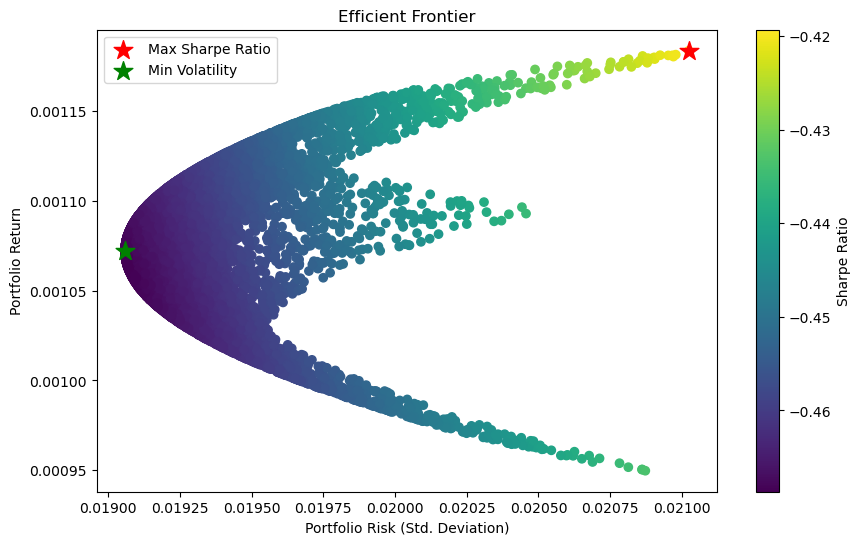

In [10]:
def main():
    tickers = ['AAPL', 'MSFT', 'GOOG']
    start_date = '2020-01-01'
    end_date = '2024-01-01'
    num_portfolios = 10000
    risk_free_rate = 0.01
    
    # Fetch historical market data
    data = fetch_data(tickers, start_date, end_date)
    
    # Calculate expected returns and covariance matrix
    mean_returns, cov_matrix = calculate_statistics(data)
    
    # Optimize portfolio
    weights = optimize_portfolio(mean_returns, cov_matrix, risk_free_rate)
    
    # Print optimal weights
    print("Optimal Portfolio Weights:")
    for i, ticker in enumerate(tickers):
        print(f"{ticker}: {weights[i][0]:.4f}")
    
    # Visualize efficient frontier
    plot_efficient_frontier(mean_returns, cov_matrix, num_portfolios)

if __name__ == "__main__":
    main()